In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **Data Exploration**

In [3]:
df = pd.read_csv("household_power_consumption.txt", sep=';', na_values='?')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
# Getting an idea about the shape of the data
print("Shape: ", df.shape)
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Shape:  (2075259, 9)
Rows:  2075259
Columns:  9


In [5]:
# Getting all the column names
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [6]:
# Checking for the presence of any null values
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

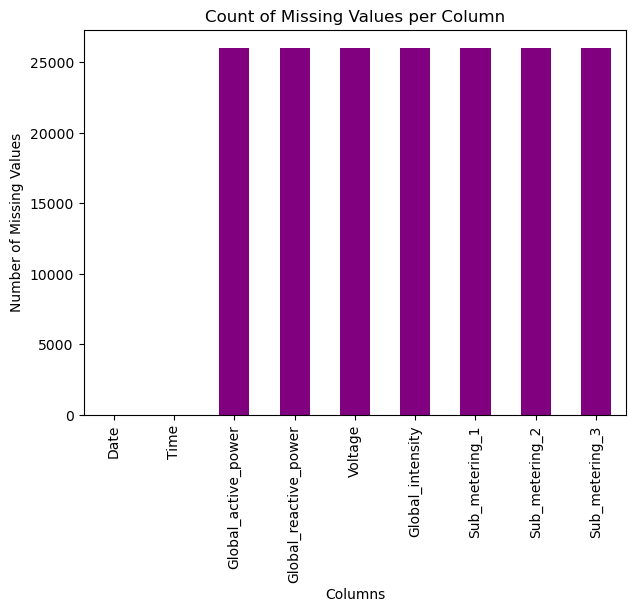

In [7]:
# Visualising missing values
na_values = df.isnull().sum()
na_values.plot(kind='bar', figsize=(7, 5), color='purple')
plt.title("Count of Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

In [8]:
# Checking for any duplicate values
df.duplicated().sum()

0

In [9]:
# Chekcing the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [10]:
# Converting the data types of the columns
df['Global_active_power'] = df['Global_active_power'].astype('float')
df['Global_reactive_power'] = df['Global_reactive_power'].astype('float')
df['Voltage'] = df['Voltage'].astype('float')
df['Global_intensity'] = df['Global_intensity'].astype('float')
df['Sub_metering_1'] = df['Sub_metering_1'].astype('float')
df['Sub_metering_2'] = df['Sub_metering_2'].astype('float')
df['Sub_metering_3'] = df['Sub_metering_3'].astype('float')

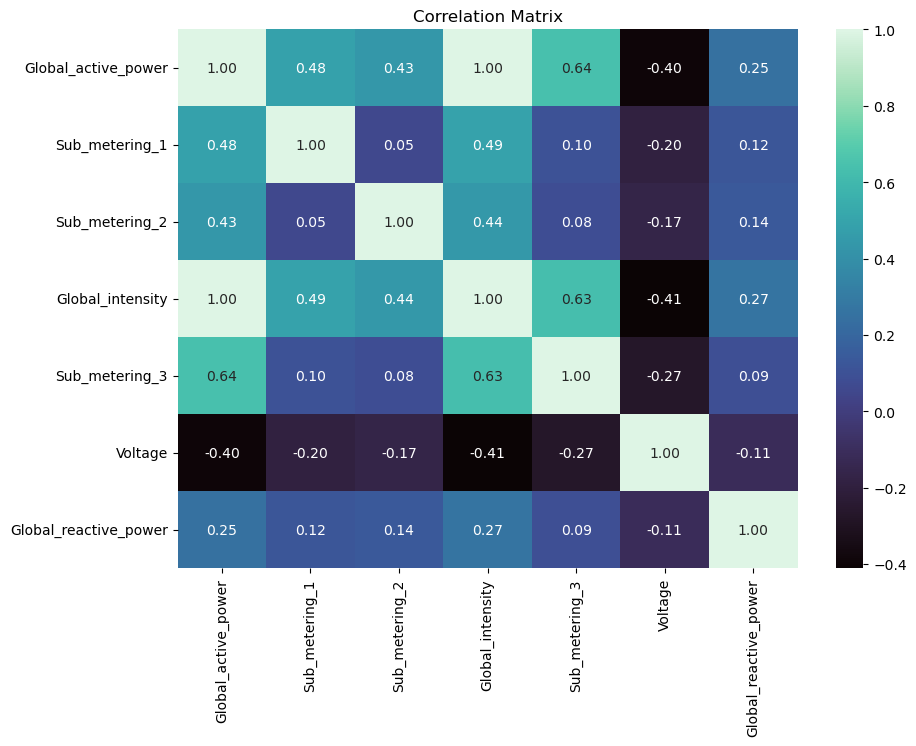

In [11]:
correlation_matrix = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', "Global_intensity",
                         'Sub_metering_3', 'Voltage', 'Global_reactive_power']].corr()
plt.figure(figsize= (10,7))
sns.heatmap(correlation_matrix, cmap = "mako", annot = True, fmt =".2f" )
plt.title("Correlation Matrix")
plt.show()

##### There is a strong negative correlation between Global_active_power/Global_intensity and Voltage. It suggests that as energy 
##### consumption (power or current) increases, voltage tends to drop, likely due to increased load on the electrical grid causing voltage dips.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2049280.0,1.091615,1.057294,0.076,0.308,0.602,1.528,11.122
Global_reactive_power,2049280.0,0.123714,0.112722,0.000,0.048,0.100,0.194,1.390
Voltage,2049280.0,240.839858,3.239987,223.200,238.990,241.010,242.890,254.150
Global_intensity,2049280.0,4.627759,4.444396,0.200,1.400,2.600,6.400,48.400
Sub_metering_1,2049280.0,1.121923,6.153031,0.000,0.000,0.000,0.000,88.000
Sub_metering_2,2049280.0,1.298520,5.822026,0.000,0.000,0.000,1.000,80.000
Sub_metering_3,2049280.0,6.458447,8.437154,0.000,0.000,1.000,17.000,31.000


##### "Global_active_power" is right-skewed , since the mean > 50th percentile (median). This suggests occasional spikes in energy usage.
##### "Voltage" is left-skewed , since the mean < 50th percentile (median). This suggests occasional spikes in lower voltage values.

### **Data Preprocessing** and **Feature Engineering**

In [13]:
# Checking percentages of missing data 
cols_with_na = ["Global_active_power", "Global_reactive_power", "Voltage",
               "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
for col in cols_with_na:
    missing_per = df[col].isnull().sum() / len(df) * 100
    print(f"Missing percentages of data before cleaning in {col}: {missing_per:.2f}%")

Missing percentages of data before cleaning in Global_active_power: 1.25%
Missing percentages of data before cleaning in Global_reactive_power: 1.25%
Missing percentages of data before cleaning in Voltage: 1.25%
Missing percentages of data before cleaning in Global_intensity: 1.25%
Missing percentages of data before cleaning in Sub_metering_1: 1.25%
Missing percentages of data before cleaning in Sub_metering_2: 1.25%
Missing percentages of data before cleaning in Sub_metering_3: 1.25%


##### There are 25979 null values in 6 of the features. Since the percentage of missing values is low compared to the entire dataset we will drop the rows with missing values.

In [14]:
# Dropping the observations with missing values 
df.dropna(inplace = True)

In [15]:
# Verifying any missing value
df.isnull().sum().any()

False

##### False means currently there are no NULL values in the dataset.

In [16]:
# Converting the data types of time-date-based columns
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"].astype(str).map(str), format="%H:%M:%S").dt.time

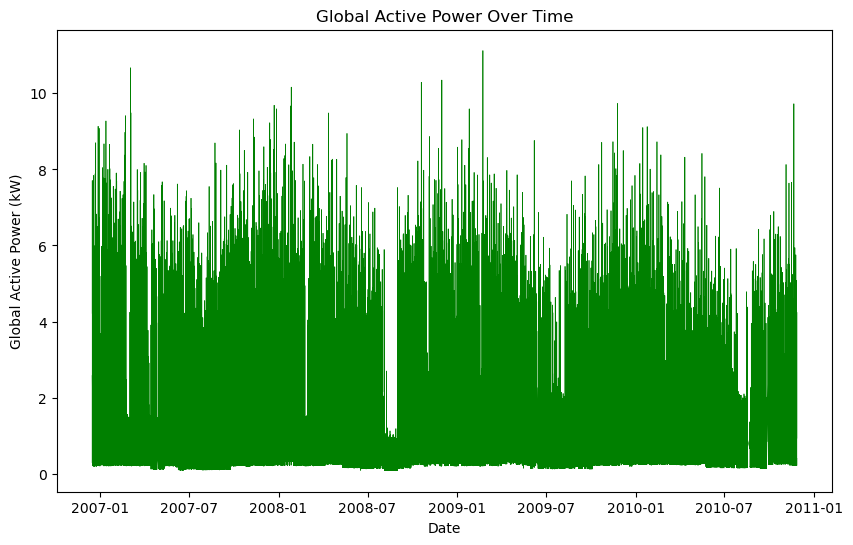

In [17]:
# Assuming 'Date_Time' is a datetime column
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Global_active_power'], color='green', linewidth=0.5)
plt.title('Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.show()

In [18]:
# Creating time-based features
df['Hour'] = pd.to_datetime(df["Time"].astype(str).map(str), format="%H:%M:%S").dt.hour
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.dayofweek
day_mapping = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7}
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)
df['Is_weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 6 else 0)

In [19]:
# Creating aggregated features
df['Total_submetering'] = (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])
df['Unmetered_power'] = df['Global_active_power'] * 1000 / 60 - df['Total_submetering']
df['Daily_avg_power'] = df.groupby(df['Date'])['Global_active_power'].transform('mean')
df['7_day_rolling_lag'] = df['Global_active_power'].shift(1).rolling(window=7, min_periods=1).mean()

def is_peak_hour(hour):
    return 1 if (6 <= hour <= 9 or 17 <= hour <= 21) else 0
df['Is_peak_hour'] = df['Hour'].apply(is_peak_hour)

In [20]:
# Rechceking null values after feature addition
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Hour                     0
Day                      0
Month                    0
DayOfWeek                0
Is_weekend               0
Total_submetering        0
Unmetered_power          0
Daily_avg_power          0
7_day_rolling_lag        1
Is_peak_hour             0
dtype: int64

In [21]:
df = df.dropna()

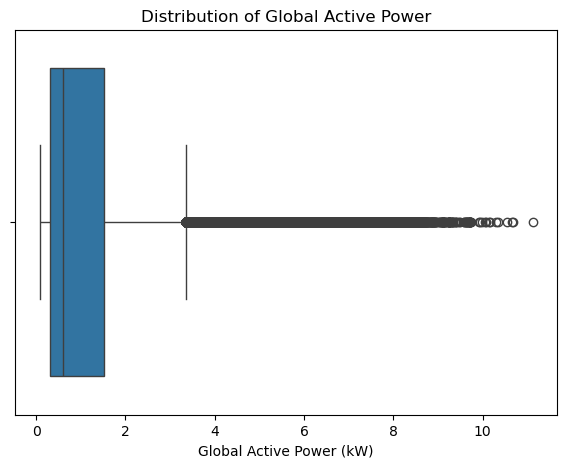

In [22]:
# Distribution of Global Active Power
plt.figure(figsize=(7, 5))
sns.boxplot(data = df, x="Global_active_power")
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.show()

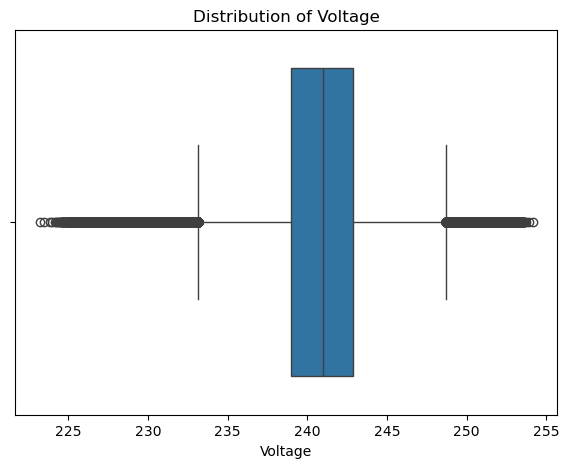

In [23]:
# Visualization of Voltage
plt.figure(figsize = (7,5))
sns.boxplot(data = df, x = "Voltage")
plt.title('Distribution of Voltage')
plt.xlabel('Voltage')
plt.show()

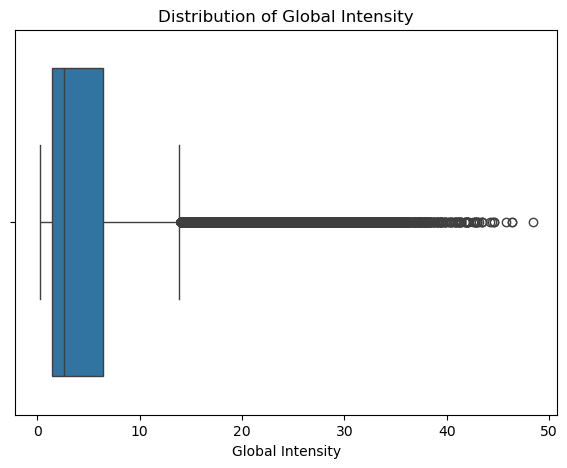

In [24]:
# Distribution of Global Active Power
plt.figure(figsize=(7, 5))
sns.boxplot(data = df, x="Global_intensity")
plt.title('Distribution of Global Intensity')
plt.xlabel('Global Intensity')
plt.show()

##### These plots show there are outliers in the data. We need to further detect and remove them.

In [25]:
# Outlier Detection and Removal
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

def remove_outliers(df, columns):
    df_clean = df.copy()
    for column in columns:
        outliers, lower, upper = detect_outliers(df, column)
        df_clean = df_clean[(df_clean[column] >= lower) & (df_clean[column] <= upper)]
    return df_clean

columns = ["Global_active_power", "Voltage", "Global_intensity"]
data = remove_outliers(df, columns)
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(data)}")

Original dataset size: 2049279
Dataset size after removing outliers: 1908312


### **Normalizing the Data**

##### Since sub_metering values are subsets of Global_active_power, we will scale the columns: "Global_active_power", "Voltage", "Global_intensity"
##### and "Global_reactive_power"

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
scaled_features = scaler.fit_transform(df[features])

### **Predictive Models**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [29]:
# Droping the columns with Timestamp objects
df.drop(["Date", "Time"], inplace = True, axis = 1)

In [30]:
# Separating the input features and target variable
X = df.drop("Global_active_power", axis = 1)
y = df["Global_active_power"]

In [31]:
# Performing train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

#### **Random Forest**

In [32]:
# Creating the model 
model = RandomForestRegressor()

# Fitting the model
model.fit(X_train, y_train)

# Taking predictions from the model
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [33]:
# Model Evaluation - 
# Testing performance 
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.013786398746857812
Testing R2 Score : 0.9998297366157325

Training RMSE : 0.005308257644781885
Training R2 Score : 0.9999748021603508


##### 1. The Training RMSE (0.005) is much lower than Testing RMSE (0.014).g

##### 2. This indicates that the random forest algorithm is overfitting.

In [34]:
# Reducing the size of dataset for hyper parameter tuning
from sklearn.utils import resample

X_sampled, y_sampled = resample(X, y, 
                               n_samples=int(len(X)*0.2),
                               random_state=42)

In [35]:
# Creating a parameter dictionary
param_grid = {
   "max_depth": [5, 10, 15],
   "min_samples_leaf": [2, 4],
   "min_samples_split": [2, 4],
    
   "n_estimators": [100, 300]
}

In [36]:
# Performing Hyper Parameter Optimization on sampled data due to large size of original dataset
rf_random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3)
rf_random.fit(X_sampled, y_sampled)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 300]})

In [37]:
# Getting the best parameter combination
print(rf_random.best_params_)

{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 15}


In [39]:
# Fitting the Optimal Model
rf_opt = RandomForestRegressor(max_depth = 15, min_samples_leaf = 2,
                                min_samples_split = 4, n_estimators = 100)

# Fitting the data
rf_opt.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=4)

In [40]:
# Taking predictions from the model
y_train_pred = rf_opt.predict(X_train)
y_pred = rf_opt.predict(X_test)

In [41]:
# Optimum Model Evaluation
# Testing performance 
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.017729747581445663
Testing R2 Score : 0.99971840515796

Training RMSE : 0.014692568711985366
Training R2 Score : 0.9998069566786897


##### 1. The Random Forest model achieves high accuracy in predicting household power consumption after hyperparameter optimization.
##### 2. Tuning improved model robustness by reducing overfitting.

#### **Linear Regression**

In [42]:
# Creating the model 
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
# Taking predictions from the model
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [44]:
# Testing performance 
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 9.475202887279687e-15
Testing R2 Score : 1.0

Training RMSE : 9.481644120741701e-15
Training R2 Score : 1.0


##### Linear Regression's perfect scores confirm it's unsuitable due to the non-linear nature of power consumption patterns.

##### Random Forest is more appropriate as it can capture complex, non-linear relationships in power consumption data, as evidenced by realistic performance metrics.

#### **XGBoost Model**

In [45]:
# Creating the model 
xgb = XGBRegressor()

# Fitting the model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
# Taking predictions from the model
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

In [47]:
# Testing performance 
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.017452663240177448
Testing R2 Score : 0.9997271380314618

Training RMSE : 0.01700043402528949
Training R2 Score : 0.9997415483325391


##### The model shows very similar train/test scores (0.017 RMSE for both).

##### Hence, further hyper parameter tuning is necessary.

In [48]:
# Reducing the size of dataset for hyper parameter tuning 
sampled_data = X.sample(frac=0.2, random_state=42)
X_sampled = sampled_data
y_sampled = y[sampled_data.index]

In [50]:
# Creating a parameter dictionary
param_grid = {
   'max_depth': [3, 5, 7, 9],
   'learning_rate': [0.01, 0.05, 0.1],
   'n_estimators': [100, 200, 300],
   'min_child_weight': [1, 3, 5],
   'subsample': [0.8, 0.9, 1.0]
}

In [51]:
# Performing Hyper Parameter Optimization on sampled data
xgb_random = RandomizedSearchCV(xgb, param_grid, n_iter=15, cv=5, n_jobs=1)
xgb_random.fit(X_sampled, y_sampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=15, n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]})

In [52]:
# Getting the best parameter combination
print(xgb_random.best_params_)

{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1}


In [53]:
# Fitting the Optimal Model
xgb_opt = XGBRegressor(max_depth = 9, learning_rate = 0.1, n_estimators = 300,
                       subsample = 0.8 , min_child_weight = 5)

# Fitting the data
xgb_opt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
# Taking predictions from the model
y_train_pred = xgb_opt.predict(X_train)
y_pred = xgb_opt.predict(X_test)

In [55]:
# Testing performance 
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.011397071712052955
Testing R2 Score : 0.9998836393463352

Training RMSE : 0.00917751599863694
Training R2 Score : 0.9999246801197879


##### 1. XGBoost achieved superior performance after tuning with test RMSE of 0.011 and R² of 0.9998, showing high accuracy in power consumption prediction.

##### 2. The model maintains good generalization with small train/test performance gap (RMSE difference 0.002).

### **Comparison between Linear Regression Model, Random Forest Model, and XGBoost Model**

##### 1) Linear Regression failed due to inability to capture non-linear power consumption patterns, showing unrealistic perfect scores.

##### 2) Random Forest demonstrated robust performance with balanced train-test scores and good generalization capabilities.

##### 3) XGBoost outperformed both models after tuning, showing lowest prediction error and optimal balance between training and testing performance.

##### 4)  XGBoost is the best choice due to its superior handling of temporal patterns and gradient boosting approach.